In [389]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('husl')

In [390]:
df = pd.read_csv('data/processed.csv', index_col=0, dtype={'key': str, 'title': str, 'authors': str, 'abstract': str, 'year_published': int, 'tags': object})
df.tags = df.tags.str.strip("[]").str.replace(r"\s*|'", '').str.split(',')
df.head()

/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_57614/1523540997.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.tags = df.tags.str.strip("[]").str.replace(r"\s*|'", '').str.split(',')


,key,title,authors,abstract,year_published,tags,category,skills,types,lang_family
0,rayyan-354359269,An experience of automated assessment in a lar...,"Zampirolli F.A., Borovina Josko J.M., Venero M...",The 2020 pandemic imposed new demands on teach...,2021,"[approach:fully_automated, data:none, techniqu...",['dynamic'],['correctness'],"['description', 'evaluation']",['OOP']
1,rayyan-354359270,Semiautomatic generation and assessment of Jav...,"Insa D., Pérez S., Silva J., Tamarit S.",Continuous assessment is essential in educatio...,2021,"[language:java, evaluation:compared_to_human, ...","['dynamic', 'static']","['correctness', 'maintainability']","['description', 'evaluation']",['OOP']
2,rayyan-354359271,A tool for evaluating computer programs from s...,"Vaneck Q., Colart T., Frénay B., Vanderose B.",Computer science studies are more and more pop...,2021,"[skill:code_quality, approach:fully_automated,...",['static'],"['readability', 'maintainability']",['description'],['OOP']
3,rayyan-354359272,Virtual Teaching Assistant for Grading Program...,"Chou C.-Y., Chen Y.-J.",This study proposes an automated programming a...,2021,"[technique:output_matching, evaluation:auto_gr...","['dynamic', 'static']",['correctness'],"['description', 'evaluation']",['Unknown']
4,rayyan-354359273,Analysis of an automatic grading system within...,"Hegarty-Kelly E., Mooney D.A.",Reliable and pedagogically sound automated fee...,2021,"[skill:code_quality, approach:fully_automated,...","['dynamic', 'static']","['correctness', 'readability']","['description', 'evaluation']",['OOP']


# Meta-Data
### Years Published

In [391]:
count_years = df.year_published.value_counts().reset_index().rename(columns={'index': 'year_published', 'year_published': 'no_published'})
count_years.head()

,year_published,no_published
0,2021,28
1,2020,28
2,2019,25
3,2018,21
4,2017,19


In [392]:
count_years.no_published.sum()

123

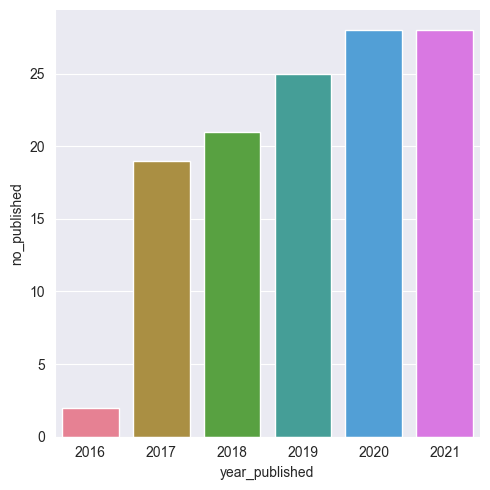

In [393]:
sns.catplot(count_years, kind='bar', x='year_published', y='no_published')
plt.savefig('plots/years_published.pdf')

## Paper Types

In [394]:
# Scaling up Functional Programming Education: Under the Hood of the OCaml MOOC

paper_types = pd.Series([paper_type for paper_type in df.types]).value_counts().reset_index()
paper_types.columns = ["paper_type", 'no_type']
paper_types['proportion'] = (paper_types.no_type / paper_types.no_type.sum()) * 100
paper_types

,paper_type,no_type,proportion
0,"['description', 'evaluation']",82,66.666667
1,['evaluation'],18,14.634146
2,['description'],12,9.756098
3,['experience'],11,8.943089


In [395]:
paper_types.no_type.sum()

123

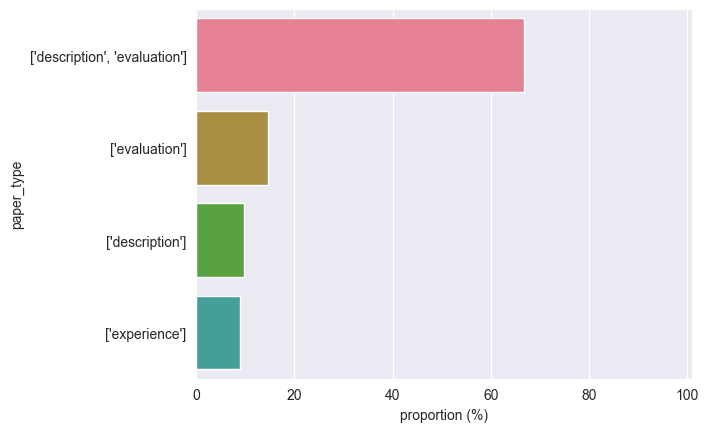

In [396]:
ax_type = sns.barplot(paper_types, y='paper_type', x='proportion')
ax_type.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/paper_types.pdf', bbox_inches='tight')

## Degree of Automation

In [397]:
auto = pd.Series([tag.replace('approach:', '') for tags in df.tags for tag in tags if tag.startswith('approach')]).value_counts().reset_index()
auto.columns = ["degree_of_automation", 'number']
auto['proportion'] = (auto.number / auto.number.sum()) * 100
auto.head()

,degree_of_automation,number,proportion
0,fully_automated,100,81.300813
1,semi_automatic,17,13.821138
2,unclear,6,4.878049


In [398]:
auto.number.sum()

123

In [399]:
pd.concat([df.title, df.tags.apply(lambda labels: [label for label in labels if 'approach' in label])], axis=1)

,title,tags
0,An experience of automated assessment in a lar...,[approach:fully_automated]
1,Semiautomatic generation and assessment of Jav...,[approach:semi_automatic]
2,A tool for evaluating computer programs from s...,[approach:fully_automated]
3,Virtual Teaching Assistant for Grading Program...,[approach:semi_automatic]
4,Analysis of an automatic grading system within...,[approach:fully_automated]
...,...,...
118,Learning and teaching numerical methods with a...,[approach:fully_automated]
119,Ask-Elle: an Adaptable Programming Tutor for H...,[approach:fully_automated]
120,An AI system for coaching novice programmers,[approach:fully_automated]
121,Automatic extraction of AST patterns for debug...,[approach:fully_automated]


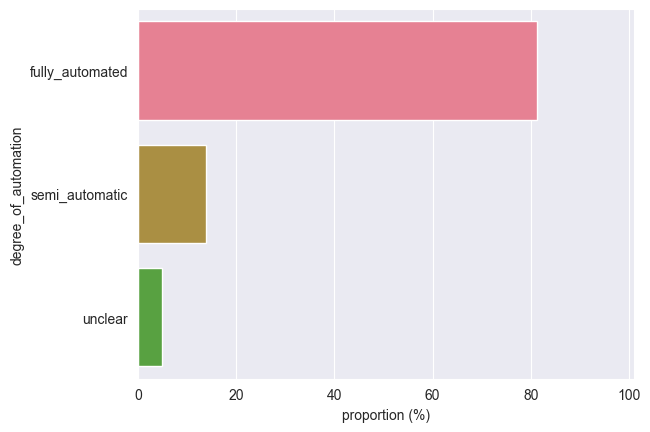

In [400]:
ax_doa = sns.barplot(auto, y='degree_of_automation', x='proportion')
ax_doa.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/auto_degree.pdf', bbox_inches='tight')

## Interaction type

In [401]:
inter = pd.Series([tag.replace('interaction:', '') for tags in df.tags for tag in tags if tag.startswith('interaction')]).value_counts().reset_index()
inter.columns = ["interaction", 'number']
inter['proportion'] = (inter.number / inter.number.sum()) * 100
inter.head()

,interaction,number,proportion
0,unknown,52,42.276423
1,multiple,50,40.650407
2,single,18,14.634146
3,none,3,2.439024


In [402]:
inter.number.sum()

123

In [403]:
pd.concat([df.title, df.tags.apply(lambda labels: [label for label in labels if 'interaction' in label])], axis=1)

,title,tags
0,An experience of automated assessment in a lar...,[interaction:unknown]
1,Semiautomatic generation and assessment of Jav...,[interaction:unknown]
2,A tool for evaluating computer programs from s...,[interaction:unknown]
3,Virtual Teaching Assistant for Grading Program...,[interaction:multiple]
4,Analysis of an automatic grading system within...,[interaction:unknown]
...,...,...
118,Learning and teaching numerical methods with a...,[interaction:multiple]
119,Ask-Elle: an Adaptable Programming Tutor for H...,[interaction:multiple]
120,An AI system for coaching novice programmers,[interaction:unknown]
121,Automatic extraction of AST patterns for debug...,[interaction:multiple]


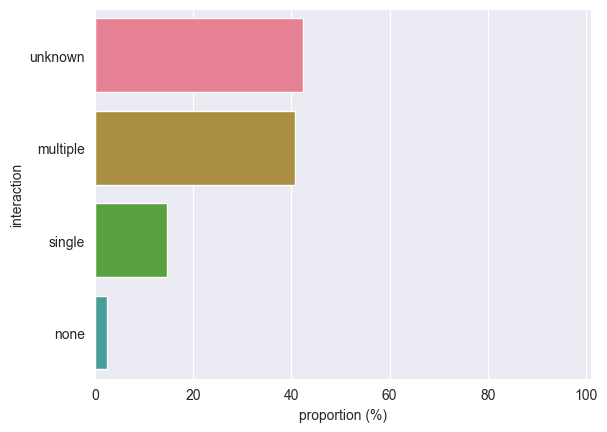

In [404]:
ax_int = sns.barplot(inter, y='interaction', x='proportion')
ax_int.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/interaction.pdf', bbox_inches='tight')

# Category

In [405]:
category = pd.Series([cat for cat in df.category]).value_counts().reset_index()
category.columns = ["category", 'number']
category['proportion'] = (category.number / category.number.sum()) * 100
category

,category,number,proportion
0,['dynamic'],52,42.622951
1,"['dynamic', 'static']",30,24.590164
2,['static'],30,24.590164
3,"['static', 'machine learning']",5,4.098361
4,['machine learning'],2,1.639344
5,"['dynamic', 'machine learning']",1,0.819672
6,['misc'],1,0.819672
7,"['dynamic', 'static', 'machine learning']",1,0.819672


In [406]:
category.number.sum()

122

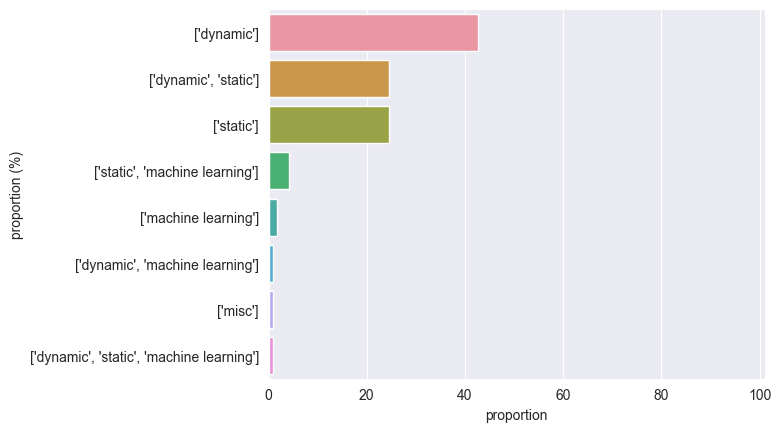

In [407]:
ax_cat = sns.barplot(category, y='category', x='proportion')
ax_cat.set(ylabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/category.pdf', bbox_inches='tight')

In [408]:
cat_time = df[['year_published', 'category']].copy()

cat_time.category = cat_time.category.fillna('') # Remove once final paper is categorised

cat_time['dynamic'] = cat_time.category.map(lambda cat: True if 'dynamic' in cat else False)
cat_time['static'] = cat_time.category.map(lambda cat: True if 'static' in cat else False)
cat_time['machine_learning'] = cat_time.category.map(lambda cat: True if 'machine learning' in cat else False)
cat_time = cat_time.drop(columns=['category'])

cat_time

,year_published,dynamic,static,machine_learning
0,2021,True,False,False
1,2021,True,True,False
2,2021,False,True,False
3,2021,True,True,False
4,2021,True,True,False
...,...,...,...,...
118,2017,True,True,False
119,2016,True,False,False
120,2017,False,True,True
121,2017,False,True,False


In [409]:
cat_time_sum = cat_time.groupby('year_published').sum().cumsum()
cat_time_sum

,dynamic,static,machine_learning
year_published,,,
2016,2,0,0
2017,11,16,1
2018,25,24,2
2019,40,38,6
2020,65,50,7
2021,84,66,9


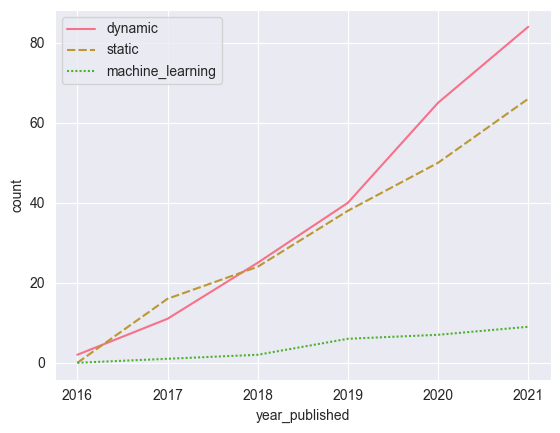

In [410]:
ax = sns.lineplot(cat_time_sum).set(ylabel='count')
plt.savefig('plots/category_time.pdf', bbox_inches='tight')

## Skills

In [411]:
skills = pd.Series([skill for skill in df.skills]).value_counts().reset_index()
skills.columns = ["skills", 'number']
skills['proportion'] = (skills.number / skills.number.sum()) * 100
skills

,skills,number,proportion
0,['correctness'],75,60.975610
1,"['correctness', 'readability']",21,17.073171
2,"['correctness', 'maintainability']",8,6.504065
3,['readability'],7,5.691057
4,"['correctness', 'readability', 'maintainability']",7,5.691057
5,"['readability', 'maintainability']",3,2.439024
6,"['correctness', 'documentation']",1,0.813008
7,['maintainability'],1,0.813008


In [412]:
skills.number.sum()

123

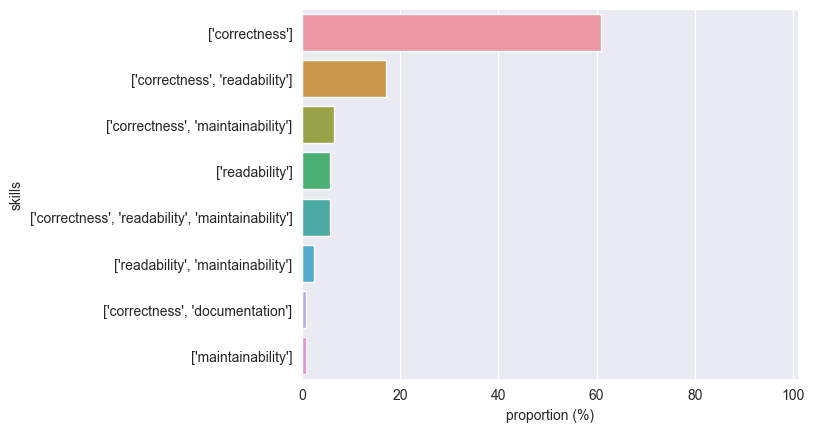

In [413]:
ax_skill = sns.barplot(skills, y='skills', x='proportion')
ax_skill.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/skills.pdf', bbox_inches='tight')

# Language

In [414]:
families = pd.Series([family for family in df.lang_family]).value_counts().reset_index()
families.columns = ["language_family", 'number']
families['proportion'] = (families.number / families.number.sum()) * 100
families

,language_family,number,proportion
0,['OOP'],85,69.105691
1,['Unknown'],9,7.317073
2,['Functional'],8,6.504065
3,['Agnostic'],5,4.065041
4,['Low-Level'],3,2.439024
5,['Graphics'],2,1.626016
6,"['OOP', 'Graphics']",2,1.626016
7,"['OOP', 'Functional']",2,1.626016
8,"['OOP', 'Agnostic']",2,1.626016
9,['Web'],2,1.626016


In [415]:
families.number.sum()

123

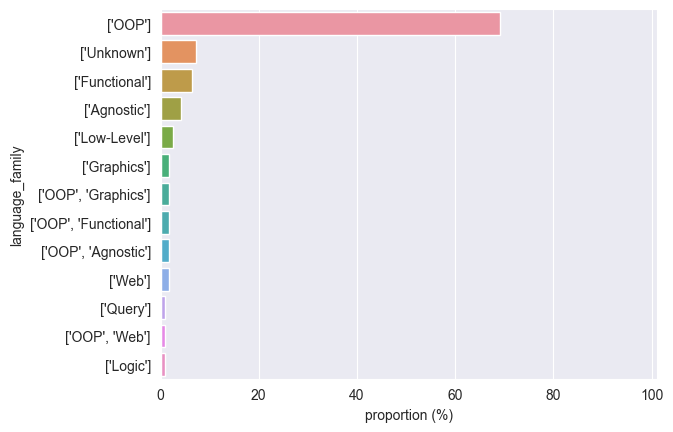

In [416]:
ax_lang = sns.barplot(families, y='language_family', x='proportion')
ax_lang.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/lang_family.pdf', bbox_inches='tight')

# Grading/Feedback Techniques

In [417]:
tech_df = pd.Series([tag.replace('technique:', '') for tags in df.tags for tag in tags if tag.startswith('technique')]).value_counts().reset_index()
tech_df.columns = ["technique", 'number']
tech_df['proportion'] = (tech_df.number / tech_df.number.sum()) * 100
tech_df

,technique,number,proportion
0,unit_testing,83,28.327645
1,pattern_matching,23,7.849829
2,model_solution_req,21,7.167235
3,static_analysis,21,7.167235
4,dsl_rules,18,6.143345
5,program_repair,13,4.436860
6,model_solution_closeness,11,3.754266
7,machine_learning,9,3.071672
8,style_check,9,3.071672
9,code_repair_for_feedback,8,2.730375


In [418]:
def add_cats(tech):
    if tech in ['unit_testing', 'property_based_testing', 'ci', 'output_matching']:
        return 'dynamic'
    if tech in ['pattern_matching', 'static_analysis', 'code_metrics', 'cluster',
                'style_check', 'program_repair', 'rule_based', 'dsl_rules', 'model_solution_req',
                'model_solution_closeness', 'code_repair_for_feedback']:
        return 'static'
    if tech in ['machine_learning', 'misc']:
        return 'other'

In [419]:
tech_df['category'] = tech_df.technique.apply(lambda tech: add_cats(tech))
tech_df

,technique,number,proportion,category
0,unit_testing,83,28.327645,dynamic
1,pattern_matching,23,7.849829,static
2,model_solution_req,21,7.167235,static
3,static_analysis,21,7.167235,static
4,dsl_rules,18,6.143345,static
5,program_repair,13,4.436860,static
6,model_solution_closeness,11,3.754266,static
7,machine_learning,9,3.071672,other
8,style_check,9,3.071672,static
9,code_repair_for_feedback,8,2.730375,static


In [420]:
tech_df.category.isna().sum()

32

In [421]:
tech_df[tech_df.category.isna()]

,technique,number,proportion,category
13,trace_examination,5,1.706485,None
14,pre_defined_questions,5,1.706485,None
15,dynamic_analysis,4,1.365188,None
16,language_stuctures,3,1.023891,None
19,test_case_generation,2,0.682594,None
20,mutation_testing,2,0.682594,None
21,matching_rules,2,0.682594,None
22,graph_analysis,2,0.682594,None
23,knowledge_base,2,0.682594,None
24,error_prediction,1,0.341297,None


In [434]:
tech_df = tech_df.sort_values(by=['category', 'proportion'], ascending=[False, True])

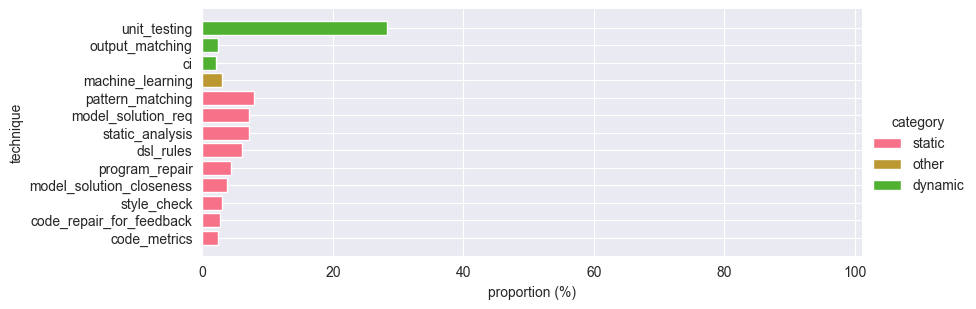

In [436]:
ax_tech_cat = sns.FacetGrid(tech_df[tech_df.number > 5], hue='category', aspect=3)
ax_tech_cat.map_dataframe(plt.barh, y='technique', width='proportion')

ax_tech_cat.set(xlim=[0, 101], xlabel='proportion (%)')
ax_tech_cat.add_legend()
plt.savefig('plots/technique_cat.pdf')

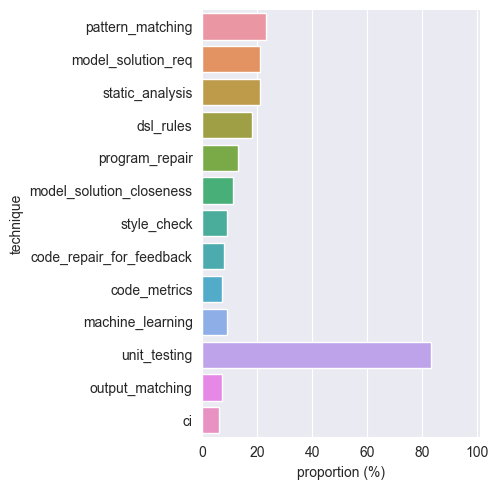

In [424]:
## TRUNCATED UNDER 6 RESULTS
ax_tech = sns.catplot(tech_df[tech_df['number'] > 5], y='technique', x='number', kind='bar')
ax_tech.set(xlabel = 'proportion (%)')

plt.xlim([0, 101])
plt.savefig('plots/technique_not_cat.pdf', bbox_inches='tight')

# Evaluation

In [425]:
# NEEDS DEDUPLICATION

evaluation  = pd.Series([tag.replace('evaluation:', '') for tags in df.tags for tag in tags if tag.startswith('evaluation')]).value_counts().reset_index()
evaluation.columns = ["evaluation", 'number']
evaluation['proportion'] = (evaluation.number / evaluation.number.sum()) * 100
evaluation

,evaluation,number,proportion
0,student_survey,39,22.674419
1,compared_to_human,23,13.372093
2,analytics,20,11.627907
3,none,12,6.976744
4,with_without,11,6.395349
5,auto_grading,9,5.232558
6,manual_grading,9,5.232558
7,auto_graders,7,4.069767
8,user_study,6,3.488372
9,grading_accuracy,6,3.488372


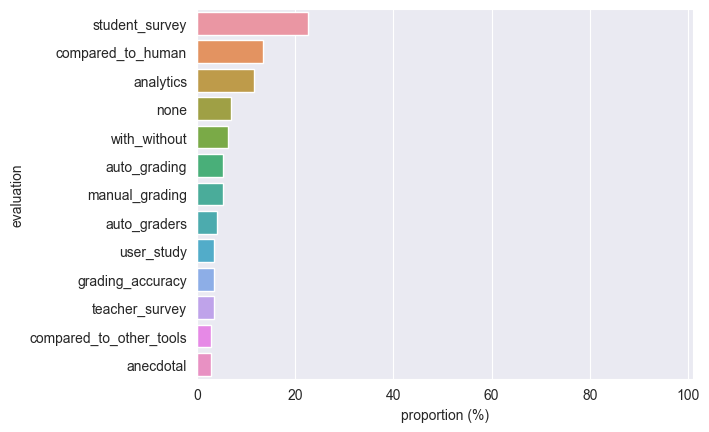

In [426]:
## TRUNCATED UNDER 5 RESULTS
ax_eval = sns.barplot(evaluation[evaluation['number'] > 4], y='evaluation', x='proportion')
ax_eval.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/evaluation.pdf', bbox_inches='tight')

## Data Availiablity

In [427]:
data_availability  = pd.Series([tag.replace('data_available:', '') for tags in df.tags for tag in tags if tag.startswith('data_available')]).value_counts().reset_index()
data_availability.columns = ["data_available", 'number']
data_availability['proportion'] = (data_availability.number / data_availability.number.sum()) * 100
data_availability

,data_available,number,proportion
0,False,105,85.365854
1,on_request,9,7.317073
2,True,9,7.317073


In [428]:
data_availability.number.sum()

123

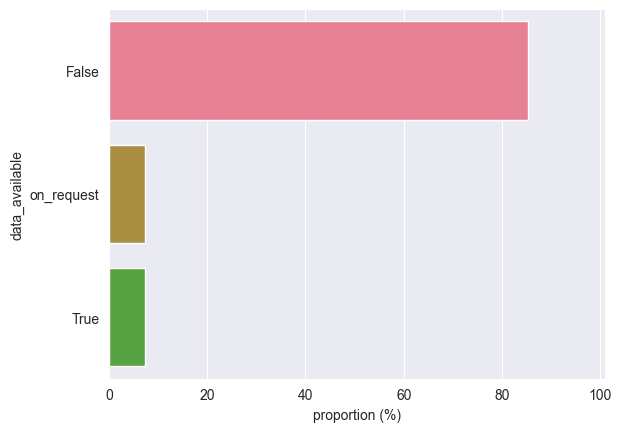

In [429]:
ax_da = sns.barplot(data_availability, y='data_available', x='proportion')
plt.xlim([0, 101])
ax_da.set(xlabel = 'proportion (%)')
plt.savefig('plots/data_availability.pdf', bbox_inches='tight')